In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
training['train_test'] = 1
test['train_test'] = 0
test['All_Survived'] = np.NaN
all_data = pd.concat([training,test])


all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'All_Survived'],
      dtype='object')

In [15]:
# Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 

In [13]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [14]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [16]:
df_num = training[['Age','SibSp','Parch','Fare']] #Use histogram 
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]#value counts


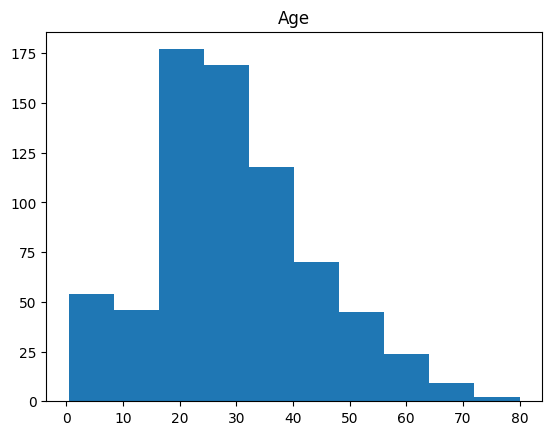

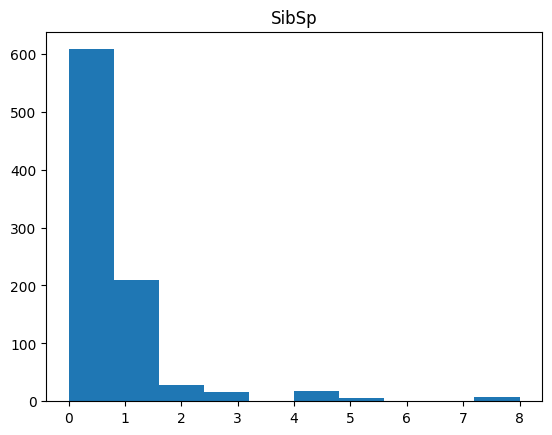

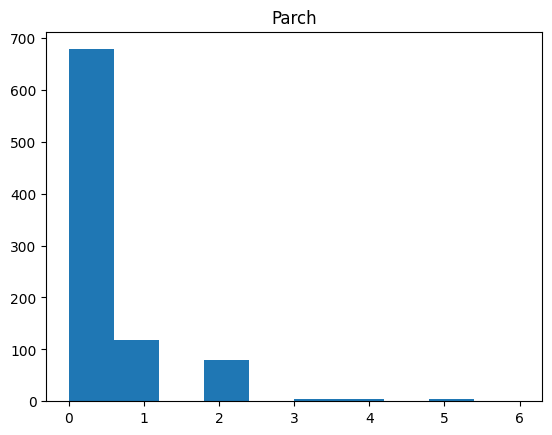

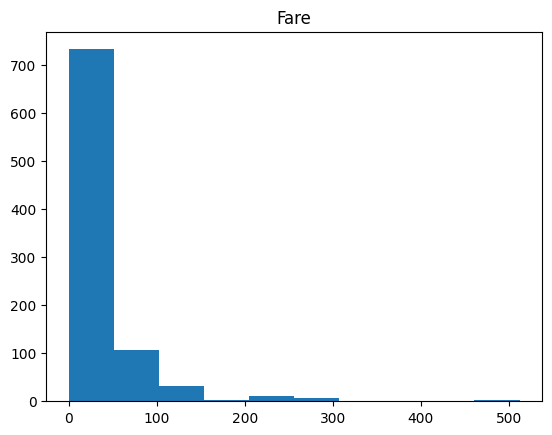

In [18]:
for i in df_num.columns: #check which of the dist follows a normal distrubution we dont need to change that
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

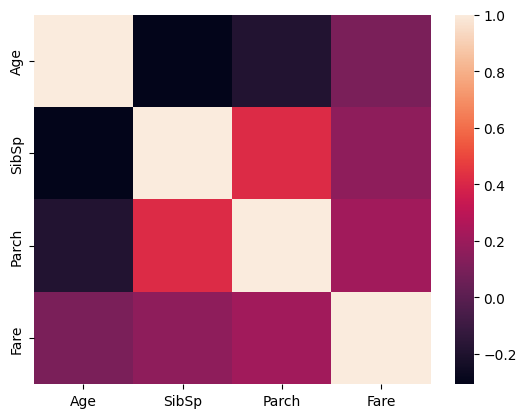

In [20]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [21]:
pd.pivot_table(training,index="Survived",values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


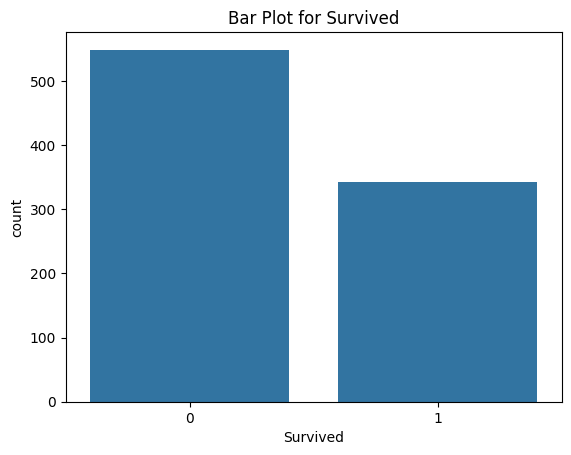

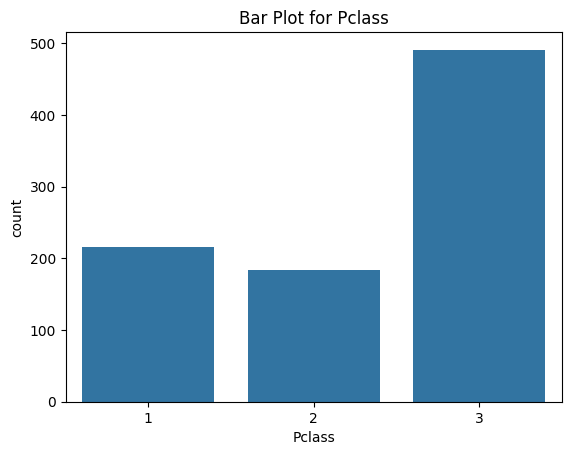

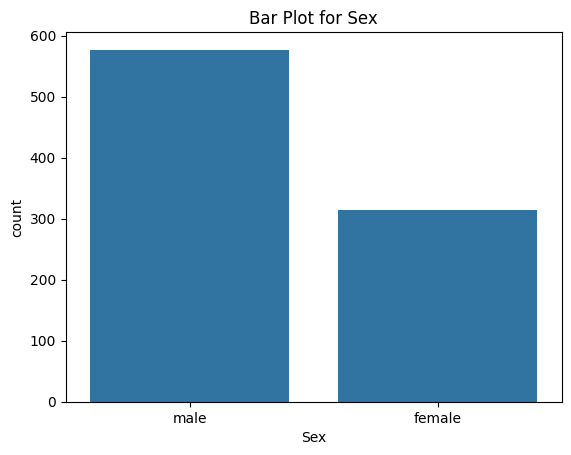

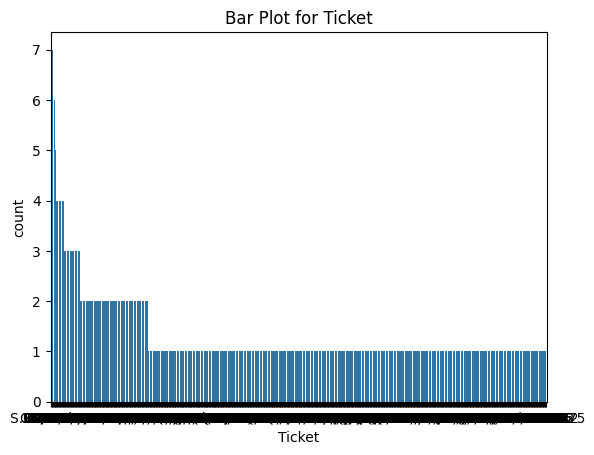

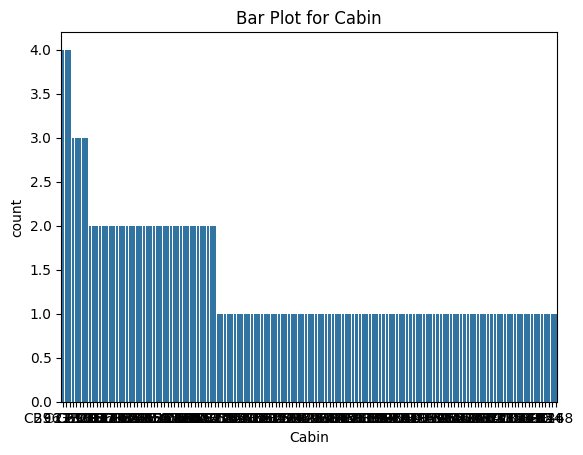

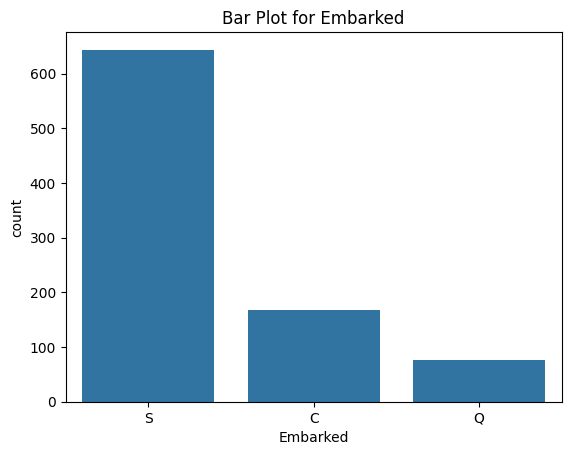

In [34]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index,y= df_cat[i].value_counts())
    plt.title(f'Bar Plot for {i}')
    plt.show()

In [35]:
df_cat.columns

Index(['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [37]:
print(pd.pivot_table(training,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(training,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(training,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [39]:
#Feature engineering on cabin and ticket 
training['cabin_multiple'] = training.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple']


0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: cabin_multiple, Length: 891, dtype: int64

In [41]:
pd.pivot_table(training,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [46]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])


In [51]:
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index = 'Survived',columns='cabin_adv',values='Name',aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0
